# Adversarial Search: Playing Connect 4

Student Name: Max Link 

I have used the following AI tools: ChatGPT 

I understand that my submission needs to be my own work: ML 

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

## Definitions: 

**Initial State:** The initial state is an empty board, with no discs in play. This means that all seven columns are empty. 

**Actions:** The player can drop a disc (red or yellow depending on their side) into one of seven columns. 

**Transition model:** Once a player drops a disc in a row, the board changes to accomodate that disc. This means that the transition model is a changing of column state from empty to filled. Blocking the other player can be considered here. 

**Goal State:** Once one side (either red or yellow) create a horizontal, vertical, or diagonal line of four discs, the game is over. 

**How big is the state space? Give an estimate and explain it.**

The state space is seven columns by six rows of available options. The columns can be represented by c and the rows can be represented by r. This means that the state space is c x r big. We know that every board spot can be either: 

1. empty 
2. filled with red's piece 
3. filled with yellow's piece 

This gives us: c x r = 7 x 6 = 42 and each of the 3 states can take on one of these 42 possibilities. 

So the state space size is roughly 3^42.  

**How big is the game tree that minimax search will go through? Give an estimate and explain it.**

The game tree represents all possible sequences of moves starting from the initial board state to all possible game endings. This tree houses the different board configurations (states) and also houses the different paths to get to these states (seq. of moves), so the size of this tree can be significantly larger than the state space size. 

Terminology: Branching factor is the average number of moves available from any given board state. Varies depending on the amount of empty columns. At the start there are 7 possible  moves because there are 7 possible columns, but the branching factor decreases as the columns are filled up. Depth of the tree is the average number of moves in a typical game. Connect 4 games rarely use all 42 spots because games usually end when one player gets four in a row. Common averages are 20-30 moves before ending. Lets assume depth is 20 for our problem. 

The game tree that minimax search will go through is roughly 4^20. To get this number, we raised the average branching factor to the power of the depth. This assumes that the average branching factor over the course of the game is about 4, as the game progresses and fewer columns are available to play. This also assumes that the average game length (depth of the tree) is about 20 moves. 

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [623]:
# import numpy for array manipulation 
import numpy as np

# this function creates an empty board 
# the empty board has a shape parameter, which is x, y 
# x here is 6, representing the 6 columns 
# y here is 7, representing the 7 columns 
def empty_board(shape=(6, 7)):
    # np.full creates a multidimensional array 
    # this multidimensional array is 6x7, meaning it has 6 row and 7 columns 
    # every value in each row is filled with a zero with the fill_value=0 parameter 
    return np.full(shape=shape, fill_value=0)

# display the empty board with a print statement below 
print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

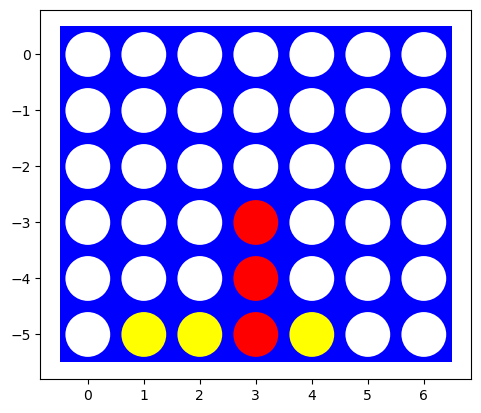

In [624]:
# Visualization code by Randolph Rankin
# -1 is yellow 
# 1 is red 

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

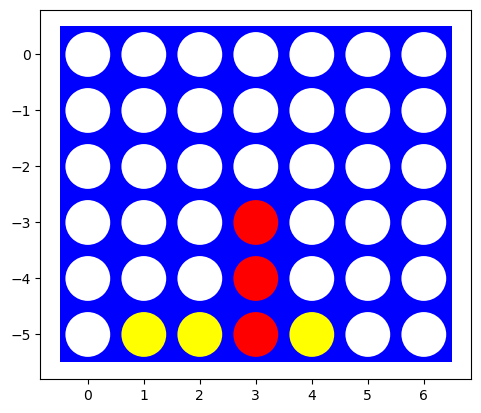

In [625]:
# custom visualization function for numpy arrays 

import matplotlib.pyplot as plt

def visualize_numpy(board):
    plt.axes()
    rectangle = plt.Rectangle((-0.5, len(board) * -1 + 0.5), len(board[0]), len(board), fc='blue')
    circles = []
    for i in range(board.shape[0]):  # using shape to iterate over numpy array
        for j in range(board.shape[1]):
            val = board[i, j]  # accessing the element directly as a scalar
            color = 'white' if val == 0 else 'red' if val == 1 else 'yellow' if val == -1 else 'black'  # Added black for unexpected values
            circles.append(plt.Circle((j, i * -1), 0.4, fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

# example usage with a numpy array
board = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, -1, -1, 1, -1, 0, 0]
])
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [626]:
# 4x4 board test 
# empty board 
board = [[0, 0, 0, 0], 
         [0, 0, 0, 0], 
         [0, 0, 0, 0], 
         [0, 0, 0, 0]]

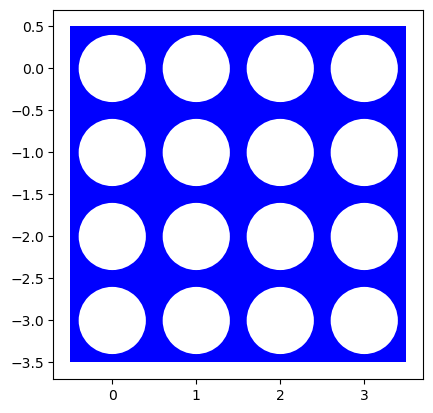

In [627]:
# visualize empty board 
visualize(board)

In [628]:
# filled 4x4 board 
filled_4 = [[0, 1, 0, -1], 
         [-1, 1, 0, 0], 
         [-1, 1, 0, 0], 
         [-1, 1, 0, 0]]

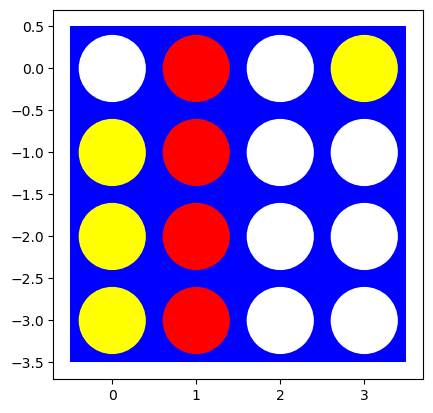

In [629]:
# visualize filled 4x4 
visualize(filled_4)

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [630]:
# for board array manipulation 
import numpy as np 

# import sys for sys.exit 
import sys

In [631]:
# function to check for win conditions - 4 in row, 4 in column, 4 in diagonal 

# function to check for columns: 
def col_checker(board): 
    # initialize state to 0 because the game by default is not won 
    state = 0 
    # the way the player won made global 
    # move = ""
    player_won = 0 # no one has won 
    # get the length of the board
    # for 4x4 should be 4 becauase len takes the vertical length 
    n = len(board)
    # empty list for holding found column   
    column = [] 
    # generate comparison array of 1's 
    # dynamic array allocation with n 
    # win state changes based on player 
    # n is the amount of columns, filling each column with only a single 1 to make a 1 row 
    # np.ones makes a matrix by default so index at 0 to just get one array for our comparison  
    win_state1 = np.ones((1, n), dtype = int) 
    # negative win state
    # np.full makes a matrix by default so we must index at 0 to just get one array for our comparison 
    win_state2 = np.full((1, n), -1) 
    # check every row of the board 
    # iterate through all columns 
    for n in range(n): 
        column += [board[:, n]]
        # use list comprehension to flatten into a list 
        flat_list = [item for sublist in column for item in sublist]
        # convert flat_list from a list to a numpy array for comparison against win_state1 and win_state2 
        flat_array = np.array(flat_list) 
        # print("flat list: ", flat_array)
        # print("win state1: ", win_state1)

        # use np.array_equal to compare arrays
        if(np.array_equal(flat_array, win_state1[0]) or np.array_equal(flat_array, win_state2[0])): 
                # print("entered if!") 
                state = 1  
                # who won? 
                if(np.array_equal(flat_array, win_state1[0])): 
                     player_won = 1 
                else: 
                     player_won = -1 
                # # the way the player won 
                # move = "four down"
        # erase column for next loop through 
        column = []
            
    return state, player_won 

In [632]:
# function to check for rows: 
def row_checker(board):

    # real logic 
    # initialize state to 0 because the game by default is not won 
    state = 0 
    # get the length of the board
    # for 4x4 should be 4 becauase len takes the vertical length 
    n = len(board)
    # the way the player won made global 
    # move = ""
    # no one has won 
    player_won = 0 
    
    # get the shape of board 
    # r is the length of the rows on the board 
    r = board.shape[1]
    # print('r:', r) 
    # generate comparison array of 1's 
    # r is for dynamic array of 1 allocation based on board size 
    # r is the amount of columns, filling them with 1's
    # np.ones defaults to making a matrix, so to get a single array we will have to index 0 
    win_state1 = np.ones((1, r), dtype = int)
    # negative win state 
    # np.full for general fill 
    # np.full defaults to making a matrix, so to get a single array we will have to index 0 
    win_state2 = np.full((1, r), -1) 
    # print("win_state:", win_state) 
    # check every row of the board 
    # 0-3 range for row 
    for row in range(n): 
        # print("this is the row being compared: \n", board[row])
        # print("win state:\n ", win_state1[0])
        # if the game is won, set state to 1 
        # compare using np.array_equal to compare each element of the arrays to each other 
        # if they are equal enter the if statement 
        # this may not be okay to compare arrays directly. 
        # if state is not one 
        if(np.array_equal(board[row], win_state1[0]) or np.array_equal(board[row], win_state2[0]) and state != 1):
            # print("state updated!") 
            state = 1 
            if(np.array_equal(board[row], win_state1[0])): 
                player_won = 1 
            else: 
                player_won = -1
            # the way the player won 
            # move = "four across"
            # print("State: ", state) 

    return state, player_won 


In [633]:
def diagonal_check(board, player):
    # print("the board for this comparison is: \n", board) 
    # move for user understanding 
    # move = "diagonal"
    player_won = 0 # no one has won 
    # extract the diagonal using np built in diagonal function 
    main_diagonal = np.diagonal(board)
    
    # get the antidiagonal 
    # flips the array horizontally with a left right flip 
    anti_diagonal = np.diagonal(np.fliplr(board))
    
    # check if the main diagonal is all positive ones 
    if np.all(main_diagonal == 1): 
        # print("the main diagonal contains ones!")
        state = 1 
        player_won = 1
        return state, player_won
    # main diagonals that contain only -1's  
    elif np.all(main_diagonal == -1): 
        state = 1 
        player_won = -1
        return state, player_won
    # check if the anti_diagonal is all positive ones 
    # np.all compares to a certain condition of 1 or -1 
    elif np.all(anti_diagonal == 1): 
        # print("the anti_diagonal contains ones!")
        state = 1 
        player_won = 1
        return state, player_won 
    # anti-diagonals that contain only -1 
    elif np.all(anti_diagonal == -1): 
        state = 1 
        player_won = -1
        return state, player_won
    # no diagonals found 
    else: 
        # print("no diagonals found")
        state = 0 
        return state, player_won 

In [634]:
# draw check 
def draw_check(board, player): 
    move = "draw"
    state = 0 
    
    # check if np array is completely full, if so set terminal state to 1
    # np.all takes the numpy array & checks that every element in it does not equal 0 
    # since this is our last board state check out of all four win conditions, then we just have to make sure the board is full of non-zero elements 
    if(np.all(board != 0)): 
       state = 1 
    
    # return the state and the move 
    return state, move 

In [635]:
# state_check function for main state check flow 

def state_check(board, player): 
    # assign player name to player number 
    if player == 1: 
        player = "red"
    else: 
        player = "yellow"
    # starting values for terminal condition 
    # start as 0 because no one has won the game yet 
    # 1 when game won: either 4 in a row, 4 in a column, or 4 diagonally  
    terminal_state = 0 
    # the state the players win by 
    state = " "
    # print("State:" , state) 
    # check if the game is won 
    # analyze all rows for four 1 or -1 
    # analyze all columns for four 1 or -1 
    # how do we do diagonals? start on a row and move in until you find 1 or -1
    # finding 1 or -1 determines which should be checked, then go to the next row 
    # on the next row, go one further than you went on the first row.... repeat until 4 hit
    # check rows - works  
    terminal_state, state = row_checker(board) 
    
    # if win condition met 
    if(terminal_state == 1): 
        # print(player, " won via ", state, "! Ending game.")
        return terminal_state
    
    # check columns 
    terminal_state, state = col_checker(board)
    
    # if win condition met 
    if(terminal_state == 1): 
        # print(player, " won via ", state, "! Ending game.")
        return terminal_state
    
    # check diagonal 
    terminal_state, state = diagonal_check(board, player) 
    
    # if win condition met 
    if(terminal_state == 1): 
        # print(player, " won via ", state, "! Ending game.")
        return terminal_state
    
    # draw state 
    terminal_state, state = draw_check(board, player)
    
    # if win condition met 
    if(terminal_state == 1): 
        # print("Draw. Ending game.")
        return terminal_state
    # if none of the conditions are met then return 
    return terminal_state


In [636]:
# np test board 
np_b = np.zeros((4, 4), dtype = int)  

In [637]:
# function for placing a piece 
def place_piece(board, player): 
    # bare bones placement code 
    length = len(board)

    # define column to search through here 
    # col can range from 0 - 3 
    col = np.random.randint(0, length)

    # set to 3 to start from bottom & subtract to go up a column 
    row = 3

    # add one to column_selected to have the first column identify as 1, second as 2, 3rd as 3 etc. 
    # print("initiaitng count for the entire ", column_selected + 1, " column")
    for r in range(length): 
        # print("row is: ", row)
        # test with random column instead of fixing at 1 
        # col = 1 
        # count conditional incremented here after checking if there is a 1 or -1 already placed & finding an empty spot 
        if board[row][col] == 1 or board[row][col] == -1: 
            # print("a 1 has been found in col ", col + 1)
            # one_count += 1 
            # decrement row to go up the row to find an empty spot 
            row -= 1 
            # print("row decremented: ", row)
            # row starts as 3 & should only decrement as low as zero 
            # if row gets to -1 then that means that an entire column is full 
            # in this case, the place_piece() function should be recursively called to run again 
            if(row == -1): 
                # print("going over column! Go to a diff column!")
                place_piece(board, player) 
        # else, found a zero
        # if you have found a zero then just place a 1 or -1 
        else: 
            # player will either be 1 or -1 depending on who is playing 
            # this can be used as the piece placement 
            board[row][col] = player 
            # as soon as place, then exit 
            break
    # returns modified board 
    return board

In [638]:
# in a traditional game of connect 4, red goes first 
# player has default value 1, signifying red 
# yellow is -1 value for player
# player set to 1 by default so that red can go first 
# pass a running row variable to simulate gravity 
def random_player(board, player = 1): 
    # print("randomly playing!")
    
    # make a copy of board 
    new_board = board.copy() 

    # code 
    if player == 1: 
        # print("Red's turn") 
        updated_board = place_piece(board, player)
        # new_board[row][col] = 1      
        new_board = updated_board
    else: 
        # print("Yellow's turn")
        updated_board = place_piece(board, player)
        new_board = updated_board
    # return the randomly updated board & the player 
    return new_board, player 

In [639]:
# make the 4x4 board of zeros with numpy array -- visualization function had to be customized to display numpy arrays but easier 

# 4 rows & 4 columns 
# initialized as np array so that the .shape check and other mechanics will work in the state_check() function 
board = np.zeros((4, 4), dtype = int)  

# visualize_numpy(board)


In [640]:
# basic game flow 

# win condition for exiting loop 
terminal_state = 0 

# while loop - game logic 
while True:
    # red goes first 
    # player is red by default in random_player, so do not pass anything in for player 
    board, player = random_player(board)
    
    # print(board)
    
    # check state - state_check will end the game if a disc is in four adjacent spots 
    # pass in the player for this check to know if you need to check for 1 or -1 
    terminal_state = state_check(board, player)
    
    # break out if win_state met 
    if(terminal_state == 1): 
        break; 

    # yellow goes second 
    yellow = -1 
    board, player = random_player(board, yellow)
    
    # print(board)

    # check state - state_check will end the game if a disc is in four adjacent spots 
    # pass player for this check like above 
    terminal_state = state_check(board, player) 
    
    # break out if win_state met  
    if(terminal_state == 1): 
        break; 
    
    # increment count 
    # count+=1
    
    
# print("new board\n", board)

In [641]:
# ------ TESTING FOR OVERLAPPING PLACEMENT OF PIECES ------# 
player = -1 

# make a board of all red and try to place a yellow 
placement_test = np.ones((4, 4), dtype = int)  

# only one empty spot 
placement_test[0][0] = 0 
placement_test[0][1] = 0

# now the place function should never go to position 3, 3
place_piece(placement_test, player)

# visualize_numpy(placement_test)

array([[ 0, -1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1,  1,  1]])

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [642]:
# initialize play_board 
play_board = np.zeros((4, 4), dtype = int)

In [643]:
def switch_player(player): 
    # if the player is red, switch to yellow 
    if player == 1: 
        # switch 
        player = -1
        # return yellow  
        return player 
    else: 
        # switch to red 
        player = 1 
        # return red 
        return player 
    

In [644]:
# red and yellow play against each other 25 times 
def play(N = 1000):  
    # integers to understand how often each player wins 
    win_yellow = 0
    win_red = 0
    
    # loop through the amount of times you can play 
    for _ in range(N): 
        # i is zero indexed so start at 1 for easy round logging 
        # print("round: ", i+1)
        # initialize an empty board 4x4 
        play_board = np.zeros((4, 4), dtype=int)
        # player starts as red 
        player = 1 
        
        while True: 
            # play_board gets updated because red plays
            play_board, player = random_player(play_board, player)
            # visualize board after each play 
            # visualize_numpy(play_board)
            # check if they win 
            # returns state = 0 if game is not done 
            win = state_check(play_board, player) 
            # print("win:", win)
            # if win does not equal zero then the game is won!
            if win != 0: 
                if player == 1: 
                    win_red += 1 
                else: 
                    win_yellow += 1 
                # print("round", i+1, " won!")
                # exit loop because game is over 
                break 
            # if game is not won, then switch player 
            player = switch_player(player)
    # return the win amounts for each player 
    return win_red, win_yellow
            

In [645]:
# play the game 
# TODO - able to play with 1000 rounds but double check that the board is not placing pieces in already taken spots 
win_red, win_yellow = play() 

In [646]:
# calculate probabilities 
# TODO - do these prob. make sense? Something is broken because yellow is way too high? 
print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  292
Yellow won:  708


Yellow has a higher win rate and this is not expected.... may be a bug with the code? 

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [647]:
# def loss_check(terminal_state, player, board): 
#     # was the game won? 
#     if(terminal_state == 1): 
#         # who lost? 
#         if(player == 1): # yellow lost 
            

In [648]:
# def check_rows(board):
#     for row in board:
#         for i in range(len(row) - 3):  # Subtract 3 to prevent out of bounds error
#             segment = row[i:i+4]
#             if abs(sum(segment)) == 4:  # Check if the sum of four elements is exactly 4 or -4
#                 player_won = segment[0]  # Determine which player has the four in a row
#                 print(f"Win detected for player: {player_won}")
#                 return 1, player_won
#     return 0, None


In [649]:
# # rework state_check() to return a -1 for loss state 
# # handle draw state automatically in evaluate function 

# # state_check function for main state check flow 
# # TODO - terminal state does not get set to 1 or -1 for loss.... never entering if statements... add new row checks, column checks, and diagonal checks to fix this.... 
# def state_check(board, player): 
#     # assign player name to player number 
#     if player == 1: 
#         player = "red"
#     else: 
#         player = "yellow"
#     # starting values for terminal condition 
#     # start as 0 because no one has won the game yet 
#     # 1 when game won: either 4 in a row, 4 in a column, or 4 diagonally  
#     terminal_state = 0 
#     # the state the players win by 
#     state = " "
#     # print("State:" , state) 
#     # check if the game is won 
#     # analyze all rows for four 1 or -1 
#     # analyze all columns for four 1 or -1 
#     # how do we do diagonals? start on a row and move in until you find 1 or -1
#     # finding 1 or -1 determines which should be checked, then go to the next row 
#     # on the next row, go one further than you went on the first row.... repeat until 4 hit
#     # check rows - works  
#     # terminal_state, player_won = row_checker(board) 
#     terminal_state, player_won = check_rows(board)
    
#     # if win condition met 
#     if(terminal_state == 1): 
#         print("ENTER CHECK") 
#         print("PLAYER: ", player)
#         print("Player that won: ", player_won)
#         # print(player, " won via ", state, "! Ending game.")
#         if(player != player_won): 
#             print("player lost")
#             # did the current player win? 
#             terminal_state = -1 
#             return terminal_state 
#         return terminal_state
    
#     # check columns 
#     terminal_state, player_won = col_checker(board)
    
#      # if win condition met 
#     if(terminal_state == 1): 
#         print("ENTER CHECK") 
#         print("PLAYER: ", player)
#         print("Player that won: ", player_won)

#         # print(player, " won via ", state, "! Ending game.")
#         if(player != player_won): 
#             print("player lost")
#             # did the current player win? 
#             terminal_state = -1 
#             return terminal_state 
#         return terminal_state
    
#     # check diagonal 
#     terminal_state, player_won = diagonal_check(board, player) 
    
#      # if win condition met 
#     if(terminal_state == 1): 
#         print("ENTER CHECK") 
#         print("PLAYER: ", player)
#         print("Player that won: ", player_won)
    
#         # print(player, " won via ", state, "! Ending game.")
#         if(player != player_won): 
#             print("player lost")
#             # did the current player win? 
#             terminal_state = -1 
#             return terminal_state 
#         return terminal_state
    
#     # loss state -- takes terminal_state & player to know which player won and which player lost 
#     # board for testing 
#     # terminal_state = loss_check(terminal_state, player, board)
#     # print("BEFORE TERM. COND ENTERED")
#     # if win condition met 
#     if(terminal_state == 1): 
#         print("ENTER CHECK") 
#         print("PLAYER: ", player)
#         print("Player that won: ", player_won)
        
#         # print(player, " won via ", state, "! Ending game.")
#         if(player != player_won): 
#             print("player lost")
#             # did the current player win? 
#             terminal_state = -1 
#             return terminal_state 
#         return terminal_state
    
#     # if none of the conditions are met then return 
#     return terminal_state


In [650]:
## ------ OLD STATE CHECK ABOVE ----- ## 

In [651]:
# check rows function 
def check_rows(board):
    # Assuming player 1 is '1' and player -1 is '-1'
    for row in board:
        for i in range(len(row) - 3):
            if abs(row[i] + row[i+1] + row[i+2] + row[i+3]) == 4:
                # Return the sign of the sum to indicate which player won
                return 1, np.sign(row[i])
    return 0, None


In [652]:
# check column function 
def check_columns(board):
    # Assuming player 1 is '1' and player -1 is '-1'
    for row in board:
        for i in range(len(row) - 3):
            if abs(row[i] + row[i+1] + row[i+2] + row[i+3]) == 4:
                # Return the sign of the sum to indicate which player won
                return 1, np.sign(row[i])
    # transpose to use the same logic as rows, cleaner code 
    return check_rows(board.T)


In [653]:
# check diagonals function 
def check_diagonals(board):
    for d in range(-board.shape[0] + 1, board.shape[1]):
        diag = np.diagonal(board, offset=d)
        for i in range(len(diag) - 3):
            if abs(diag[i] + diag[i+1] + diag[i+2] + diag[i+3]) == 4:
                return 1, np.sign(diag[i])
        anti_diag = np.diagonal(np.fliplr(board), offset=d)
        for i in range(len(anti_diag) - 3):
            if abs(anti_diag[i] + anti_diag[i+1] + anti_diag[i+2] + anti_diag[i+3]) == 4:
                return 1, np.sign(anti_diag[i])
    return 0, None


In [654]:
# simpler state check function 
def state_check(board, current_player):
    # Check rows, columns, and diagonals for a win
    for check in (check_rows, check_columns, check_diagonals):
        terminal_state, player_won = check(board)
        if terminal_state == 1: # there is a win detected
            # If there's a win, check if the winner is the current player
            if player_won == current_player:
                return 1  # Current player won
            else:
                return -1  # Current player lost (opponent won)
    return 0  # No win or loss detected, for draw 


In [655]:
def place_piece(board, player, col):
    # Create a copy of the board to avoid altering the original during recursion
    new_board = board.copy()
    for row in range(len(board) - 1, -1, -1):  # Start from the bottom row and move upwards
        if new_board[row][col] == 0:
            new_board[row][col] = player  # Place the player's piece in the first empty spot
            break
    return new_board


In [656]:
# function to enhance evaluate() 
# assists in strategic decision making 
def check_potential_lines(board, row, col, player):
    directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]  # Right, Down, Diagonal Down Right, Diagonal Up Right
    line_potential = 0

    for dr, dc in directions:
        count = 0
        for i in range(1, 4):
            nr, nc = row + dr*i, col + dc*i
            if 0 <= nr < board.shape[0] and 0 <= nc < board.shape[1]:
                if board[nr][nc] == player:
                    count += 1
                elif board[nr][nc] != 0:
                    count = 0  # Break on encountering opponent's piece
                    break
            else:
                break
        line_potential += count

    return line_potential


In [657]:
# dumb evaluate 
# def evaluate(board, player, terminal_state):
#     """
#     Evaluate the board strictly based on terminal state:
#     - +1000 for a win,
#     - -1000 for a loss,
#     - 0 for a draw or non-terminal states.
#     """
#     # print("TERMINAL STATE IN EVAL: ", terminal_state)
#     if terminal_state == 1:  # A win detected
#         # Check if the last move was by the player
#         return 1000 if player == 1 else -1000
#     elif terminal_state == -1:  # A loss detected
#         # Check if the last move was not by the player
#         print("ran terminal -1")
#         return -1000 if player == 1 else 1000
#     else:
#         # It's either a draw or the game is still ongoing
#         return 0

# # Note: This assumes your state_check function sets terminal_state to 1 for a win and -1 for a loss
# # and properly handles the setting of these values based on the last move made.


In [658]:
# check win condition for threat detection function one cell below 
def check_win(board, player, row, col):
    # Check if placing a piece here results in a win
    directions = [(0, 1), (1, 0), (1, 1), (1, -1)]
    for dr, dc in directions:
        count = 1
        for i in range(1, 4):
            nr, nc = row + dr*i, col + dc*i
            if 0 <= nr < board.shape[0] and 0 <= nc < board.shape[1] and board[nr][nc] == player:
                count += 1
            else:
                break
        if count >= 4:
            return True
    return False

In [659]:
# threat detection 
def count_threats(board, player):
    threats = 0
    opponent = -1 if player == 1 else 1
    # Check all rows, columns, and diagonals
    for r in range(board.shape[0]):
        for c in range(board.shape[1]):
            if board[r][c] == 0:
                # Temporarily place the player's piece
                board[r][c] = player
                if check_win(board, player, r, c):
                    threats += 1
                # Reset after check
                board[r][c] = 0

                # Check opponent's threats by temporarily placing their piece
                board[r][c] = opponent
                if check_win(board, opponent, r, c):
                    threats -= 1
                board[r][c] = 0

    return threats

In [660]:
# smart evaluate 
# added a small amount of randomness so that each round does not end up the same 
import random

def evaluate(board, player, terminal_state):
    if terminal_state == 1:
        return 1000 if player == 1 else -1000
    elif terminal_state == -1:
        return -1000 if player == 1 else 1000
    elif terminal_state == 2:
        return 0  # Draw scenario

    score = 0
    score += count_threats(board, player) * 10

    for r in range(board.shape[0]):
        for c in range(board.shape[1]):
            if board[r][c] == player:
                if c == board.shape[1] // 2:
                    score += 3
                score += check_potential_lines(board, r, c, player)
    
    # Add a small random component
    score += random.uniform(-0.5, 0.5)  # Very small random value to mix things up
    return score



In [662]:
# specific version 
def get_possible_moves(board, player):
    moves = []
    # print("Current board state before making moves:")
    # for row in board:
    #     print(' '.join(map(str, row)))

    for col in range(len(board[0])):
        # Ensure to check from the top of the column down to find the first non-full position
        full = True
        for row in range(len(board)):
            if board[row][col] == 0:
                full = False
                break
        if not full:
            # print(f"Column {col} is not full, attempting to place a piece...")
            new_board = place_piece(board, player, col)
            moves.append((new_board, col))
            # print(f"Valid move at column {col}. Board state after placing the piece:")
            # for row in new_board:
            #     print(' '.join(map(str, row)))
        # else:
            # print(f"Column {col} is full, skipping...")
    # print(f"Total moves available: {len(moves)}")
    return moves


In [663]:
# minimax uses get_possible_moves(). modular design. 
def minimax(board, depth, alpha, beta, player):
    # gets board, gets player 
    # looks for win or loss state 
    # board must be a numpy array here or else the state_check function will not return the right terminal state 
    # print("Board state passed to state_check:")
    # print(board)

    terminal_state = state_check(board, player)
    # print("TERM STATE MINIMAX: ", terminal_state)
    if terminal_state != 0 or depth == 0:
        return evaluate(board, player, terminal_state)
    
    if player == 1:  # Maximizing for Red
        # print("Maximizing for player Red")
        maxEval = float('-inf')
        # print("possible moves: \n", get_possible_moves(board, player))
        for new_board, _ in get_possible_moves(board, player):
            # print("THE NEW BOARD IS: \n")
            # print(new_board)
            eval = minimax(new_board, depth - 1, alpha, beta, -1)
            maxEval = max(maxEval, eval)
            alpha = max(alpha, eval)
            # print("Beta: ", beta)
            # print("Alpha: ", alpha)
            if beta <= alpha:
                break
        # print("maxEval:", maxEval)
        return maxEval
    else:  # Minimizing for Yellow
        minEval = float('inf')
        # print(get_possible_moves(board, player))
        for new_board, _ in get_possible_moves(board, player):
            eval = minimax(new_board, depth - 1, alpha, beta, 1)
            minEval = min(minEval, eval)
            beta = min(beta, eval)
            # print("Beta: ", beta)
            # print("Alpha: ", alpha)
            if beta <= alpha:
                break
        # print("minEval:", minEval)
        return minEval



In [664]:
# calls minimax function to kick off minimax search 
def best_move(board, player, depth=4):
    best_score = float('-inf') if player == 1 else float('inf')
    best_col = -1  # If no move is found, this will signal no available moves
    # print("Calculating best move...")

    for new_board, col in get_possible_moves(board, player):
        score = minimax(new_board, depth - 1, float('-inf'), float('inf'), -player)
        # print(f"Score for column {col}: {score}")
        # print("SCORE: ", score)
        if (player == 1 and score > best_score) or (player == -1 and score < best_score):
            best_score = score
            best_col = col
    # print(f"Best move is in column {best_col} with score {best_score}")
    return best_col


In [665]:
# updated to use best_move() 
def play(N=1): # 1000 was original round count. trying with 1 round for debugging board update behavior. 
    win_yellow = 0
    win_red = 0
    
    for _ in range(N):
        play_board = np.zeros((4, 4), dtype=int)
        player = 1  # Start with Red

        while True:
            move = best_move(play_board, player, depth=4)
            # print("MOVE:", move)
            if move == -1:
                # print("Draw or no valid moves")
                break  # Break out of the loop if no moves are possible
            # visualize_numpy(play_board)
            # print('---Board before update----')
            # print(play_board)
            # update the current board 
            play_board = place_piece(play_board, player, move)
            # print('----UPDATED-----')
            # print(play_board)

            win = state_check(play_board, player)
            if win == 1:
                if player == 1:
                    win_red += 1
                else:
                    win_yellow += 1
                break
            player = switch_player(player)
        
    # visualize_numpy(play_board)
    return win_red, win_yellow


In [666]:
# test array
def draw_board(): 
    test_board = np.ones((4, 4), dtype=int)

    test_board[0][0] = 0
    test_board[0][1] = 0
    test_board[0][2] = -1
    test_board[1][0] = -1
    test_board[2][0] = -1
    test_board[3][0] = -1
    test_board[0][3] = -1
    test_board[3][0] = 1
    test_board[3][1] = -1
    test_board[3][3] = -1



    # print(test_board)
    return test_board 


In [667]:
def yellow_win_board(): 
    test_board = np.ones((4, 4), dtype=int)

    test_board[0][0] = 0
    test_board[0][1] = 0
    test_board[0][2] = 1
    test_board[1][0] = -1
    test_board[2][0] = -1
    test_board[3][0] = -1
    test_board[0][3] = -1
    test_board[3][0] = -1
    test_board[3][1] = -1
    test_board[3][3] = -1
    test_board[2][2] = -1



    # print(test_board)
    return test_board 

In [668]:
def red_win_board(): 
    test_board = np.ones((4, 4), dtype=int)

    test_board[0][0] = 0
    test_board[0][1] = 0
    test_board[0][2] = -1
    test_board[1][0] = -1
    test_board[2][0] = -1
    test_board[3][0] = -1
    test_board[0][3] = -1
    test_board[3][0] = -1
    test_board[3][1] = -1
    test_board[3][3] = 1



    # print(test_board)
    return test_board 

In [669]:
# updated to use best_move() 
def play_test(input_board, N=1000): # 1000 was original round count. trying with 1 round for debugging board update behavior. 
    win_yellow = 0
    win_red = 0
    
    for i in range(N):
        # print("round ", i+1)
        # play_board = np.zeros((4, 4), dtype=int)
        # create test board 
        # input_board is the starting template for each round 
        test_board = input_board
        # test_board = draw_board() 

        # test_board[0][0] = 0
        # test_board[0][1] = 0
        # test_board[0][2] = -1
        # test_board[1][0] = -1
        # test_board[2][0] = -1
        # test_board[3][0] = -1
        # test_board[0][3] = -1
        # test_board[3][0] = 1
        # test_board[3][1] = -1
        # test_board[3][3] = -1

        player = 1  # Start with Red

        while True:
            # print("player is: ", player)
            move = best_move(test_board, player, depth=4)
            # print("MOVE:", move)
            if move == -1:
                # print("Draw or no valid moves")
                break  # Break out of the loop if no moves are possible
            # visualize_numpy(play_board)
            # print('---Board before update----')
            # print(test_board)
            # update the current board 
            test_board = place_piece(test_board, player, move)
            # print('----UPDATED-----')
            # print(test_board)
            # visualize_numpy(test_board)

            win = state_check(test_board, player)
            if win == 1:
                if player == 1:
                    win_red += 1
                else:
                    win_yellow += 1
                break
            player = switch_player(player)
            # print("switched player. Player is: ", player)
        

    return win_red, win_yellow


In [670]:
# create board to test with 
input_board = np.zeros((4, 4), dtype=int)

# print(input_board)

In [671]:
# play with minimax search 
win_red, win_yellow = play_test(input_board) 

In [672]:
print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  29
Yellow won:  119


In [673]:
# experiment with 4x4 board 
# ensure that class info state information is stored so that the program can play against other players 

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [735]:
# test array
def empty_diagonal(): 
    test_board = np.ones((4, 4), dtype=int)
    test_board[0][0] = 0
    test_board[0][1] = 0
    test_board[1][1] = 0
    test_board[2][2] = 0
    test_board[3][3] = 0
    test_board[0][2] = 0
    test_board[1][2] = 0
    test_board[0][3] = 0
    test_board[1][0] = -1
    test_board[2][0] = -1
    test_board[3][0] = -1
    test_board[3][0] = 1
    test_board[3][1] = -1
    test_board[1][3] = 0
    test_board[2][3] = 0 


    return test_board 

In [739]:
# test array
def empty_top_row(): 
    test_board = np.ones((4, 4), dtype=int)
    
    test_board[0][0] = 0
    test_board[0][1] = 0
    test_board[0][2] = 0 
    test_board[0][3] = 0
    test_board[1][0] = -1
    test_board[2][0] = -1
    test_board[3][0] = -1
    test_board[3][0] = -1
    test_board[3][1] = -1
    test_board[3][3] = 1



    # print(test_board)
    return test_board 

In [676]:
# test array
def draw_board(): 
    test_board = np.ones((4, 4), dtype=int)

    test_board[0][0] = 0
    test_board[0][1] = 0
    test_board[0][2] = -1
    test_board[1][0] = -1
    test_board[2][0] = -1
    test_board[3][0] = -1
    test_board[0][3] = -1
    test_board[3][0] = 1
    test_board[3][1] = -1
    test_board[3][3] = -1



    # print(test_board)
    return test_board 

In [677]:
# draw board 
input_board = draw_board() 

# one round testing draw condition 
win_red, win_yellow = play_test(input_board, N = 1) 

print("Red won: ", win_red)

print("Yellow won: ", win_yellow)


Red won:  0
Yellow won:  0


In [743]:
# yellow win board 
input_board = yellow_win_board() 


# one round testing yellow win condition 
win_red, win_yellow = play_test(input_board, N = 1) 


print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  0
Yellow won:  1


In [679]:
# red win board 
input_board = red_win_board() 

# one round testing red win condition 
win_red, win_yellow = play_test(input_board, N = 1) 

print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  1
Yellow won:  0


In [741]:
# board with an empty diagonal 
input_board = empty_diagonal() 

# one round testing red pre-win before game start 
win_red, win_yellow = play_test(input_board, N = 1) 

print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  0
Yellow won:  0


In [740]:
# board with an empty top row 
input_board = empty_top_row() 

# one round testing yellow pre-win before game start 
win_red, win_yellow = play_test(input_board, N = 1) 

print("Red won: ", win_red)

print("Yellow won: ", win_yellow)


Red won:  1
Yellow won:  0


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [754]:
# timing added to play_test() 
import time 
# updated to use best_move() 
def play_test_timed(input_board, N=1000): # 1000 was original round count. trying with 1 round for debugging board update behavior. 
    win_yellow = 0
    win_red = 0

    # holds the times for the average 
    times = []

    # holds the average time across both players 
    average_time = 0 

    # for timing a single move 
    best_move_time = 0 
    place_piece_time = 0 
    
    for i in range(N):
        # print("round ", i+1)
        # play_board = np.zeros((4, 4), dtype=int)
        # create test board 
        # input_board is the starting template for each round 
        test_board = input_board

        player = 1  # Start with Red

        while True:
            # print("player is: ", player)
            start_time = time.time() # start the timer 
            move = best_move(test_board, player, depth=4)
            best_move_time = time.time() - start_time 
            times.append(best_move_time)

            # print("MOVE:", move)
            if move == -1:
                # print("Draw or no valid moves")
                # print("time for evaluating that no moves were possible: ", formatted_time)
                break  # Break out of the loop if no moves are possible
            # visualize_numpy(play_board)
            # print('---Board before update----')
            # print(test_board)
            # update the current board 
            # time.time() outputs seconds 
            start_time = time.time() 
            test_board = place_piece(test_board, player, move) 
            place_piece_time = time.time() - start_time
            total_time = place_piece_time + best_move_time 
            times.append(total_time)
            # print("time for evaluating moves + placing piece: ", formatted_time)

            # print('----UPDATED-----')
            # print(test_board)
            # visualize_numpy(test_board)

            win = state_check(test_board, player)
            if win == 1:
                if player == 1:
                    win_red += 1
                else:
                    win_yellow += 1
                break
            player = switch_player(player)
            # print("switched player. Player is: ", player)
        
    # calculate average time 
    average_time = sum(times)/len(times)

    return win_red, win_yellow, average_time 


In [756]:
# 4 column test

input_board = np.zeros((4, 4), dtype=int)

# 25 rounds for our average sample size 
_, _, average_time = play_test_timed(input_board, N = 25)

print("The average time for a single move is: ", average_time)


The average time for a single move is:  0.009370614211637896


In [757]:
# 10 column test 

input_board = np.zeros((4, 10), dtype=int)

# 25 rounds for our average sample size 
_, _, average_time = play_test_timed(input_board, N = 25)

print("The average time for a single move is: ", average_time)

The average time for a single move is:  0.5551796927737261


As the times show, adding more columns to the board exponentially increases the time it takes to place a piece on the board. For 25 rounds with 4 columns, it takes on average 0.00937 seconds. When 25 rounds are tested with 10 columns, it takes on average 0.555 seconds. 

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

## move order explanation

we can enhance our move strategy by modifying our get_possible_moves function. In our original, we do not prioritize the center of the board & just generate possible moves. In our new get_possible_moves, we can prioritize the center of the board while also only generating moves of strategic importance to avoid sorting columns. By avoiding sorting, we are saving computational time. 

The enhanced get_possible_moves function is way faster than the original get_possible_moves function. 

[REFINE EXPLANATION]

In [786]:
# original get_possible_moves function for a base test 

# specific version 
def get_possible_moves(board, player):
    moves = []
    # print("Current board state before making moves:")
    # for row in board:
    #     print(' '.join(map(str, row)))

    for col in range(len(board[0])):
        # Ensure to check from the top of the column down to find the first non-full position
        full = True
        for row in range(len(board)):
            if board[row][col] == 0:
                full = False
                break
        if not full:
            # print(f"Column {col} is not full, attempting to place a piece...")
            new_board = place_piece(board, player, col)
            moves.append((new_board, col))
            # print(f"Valid move at column {col}. Board state after placing the piece:")
            # for row in new_board:
            #     print(' '.join(map(str, row)))
        # else:
            # print(f"Column {col} is full, skipping...")
    # print(f"Total moves available: {len(moves)}")
    return moves


In [787]:
print("Testing without enhanced move ordering...")

# 4x4 board for easy testing 
# 4 depth 
input_board = np.zeros((4, 4), dtype=int)

_, _, avg_time_base = play_test_timed(input_board)

Testing without enhanced move ordering...


In [789]:
print("Average base time: ", avg_time_base)

Average base time:  0.009195165827306976


In [790]:
# modify our get_possible_moves function to prioritize the center & to avoid sorting the moves 
def get_possible_moves(board, player):
    center = board.shape[1] // 2
    moves = []
    column_order = [center]  # Start with the center column

    # Create order of columns to check, expanding outwards from the center
    for offset in range(1, center+1):
        if center - offset >= 0:  # Check to the left
            column_order.append(center - offset)
        if center + offset < board.shape[1]:  # Check to the right
            column_order.append(center + offset)

    # Generate moves in the order of strategic importance
    for col in column_order:
        if board[0][col] == 0:  # Only add if the top of the column is empty
            new_board = place_piece(board, player, col)
            moves.append((new_board, col))

    return moves



In [795]:
print("Testing with enhanced move ordering...")

# same 4x4 board test as base case  
input_board = np.zeros((4, 4), dtype=int)

_, _, avg_time_enhanced = play_test_timed(input_board) # how does this part work? Not callable?

print("Average base time: ", avg_time_enhanced)

Testing with enhanced move ordering...
Average base time:  0.006998226525186216


In [796]:
# Output results in a formatted table
from tabulate import tabulate

results = [
    ["Without Move Ordering", avg_time_base],
    ["With Move Ordering", avg_time_enhanced]
]
print(tabulate(results, headers=["Strategy", "Average Time (seconds)"]))

Strategy                 Average Time (seconds)
---------------------  ------------------------
Without Move Ordering                0.00919517
With Move Ordering                   0.00699823


### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [797]:
# Your code/ answer goes here.

input_board = np.zeros((4, 8), dtype=int)

_, _, average_time = play_test_timed(input_board, N = 25)

print("The average time for a single move on a completely empty board is: ", average_time)


The average time for a single move on a completely empty board is:  0.1232793524035907


You can prioritize the center first to have the most possible moves open up to you for quicker chances at winning a round, you can also try to predict if your opponent is about to win and try to block him to take away your opponent's options for wins. 

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [813]:
# function for placing a piece 
def place_piece_random(board, player): 
    # bare bones placement code 
    length = len(board)

    # define column to search through here 
    # col can range from 0 - 3 
    col = np.random.randint(0, length)

    # set to 3 to start from bottom & subtract to go up a column 
    row = 3

    # add one to column_selected to have the first column identify as 1, second as 2, 3rd as 3 etc. 
    # print("initiaitng count for the entire ", column_selected + 1, " column")
    for r in range(length): 
        # print("row is: ", row)
        # test with random column instead of fixing at 1 
        # col = 1 
        # count conditional incremented here after checking if there is a 1 or -1 already placed & finding an empty spot 
        if board[row][col] == 1 or board[row][col] == -1: 
            # print("a 1 has been found in col ", col + 1)
            # one_count += 1 
            # decrement row to go up the row to find an empty spot 
            row -= 1 
            # print("row decremented: ", row)
            # row starts as 3 & should only decrement as low as zero 
            # if row gets to -1 then that means that an entire column is full 
            # in this case, the place_piece() function should be recursively called to run again 
            if(row == -1): 
                # print("going over column! Go to a diff column!")
                place_piece_random(board, player) 
        # else, found a zero
        # if you have found a zero then just place a 1 or -1 
        else: 
            # player will either be 1 or -1 depending on who is playing 
            # this can be used as the piece placement 
            board[row][col] = player 
            # as soon as place, then exit 
            break
    # returns modified board 
    return board

In [810]:
# random player redone to use place_piece_random() 
# the minimax agent uses the place_piece() function because that was updated to not place randomly 
def random_player(board, player = 1): 
    # print("randomly playing!")
    
    # make a copy of board 
    new_board = board.copy() 

    # code 
    if player == 1: 
        # print("Red's turn") 
        updated_board = place_piece_random(board, player)
        # new_board[row][col] = 1      
        new_board = updated_board
    else: 
        # print("Yellow's turn")
        updated_board = place_piece_random(board, player)
        new_board = updated_board
    # return the randomly updated board & the player 
    return new_board, player 

In [824]:

def play_mini_v_rand(input_board, N=1000): # 1000 was original round count. trying with 1 round for debugging board update behavior. 
    win_yellow = 0
    win_red = 0
    
    red_losses = 0 
    yellow_losses = 0 

    draws = 0 

    for i in range(N):
        print("round ", i+1)
        # play_board = np.zeros((4, 4), dtype=int)
        # create test board 
        # input_board is the starting template for each round 
        test_board = input_board

        player = 1  # Start with Red

        while True:
            if(player == 1): # red uses the minimax 
                # print("player is: ", player)
                move = best_move(test_board, player, depth=4)
            

                # print("MOVE:", move)
                if move == -1:
                    # print("Draw or no valid moves")
                    # print("time for evaluating that no moves were possible: ", formatted_time)
                    break  # Break out of the loop if no moves are possible
                # visualize_numpy(play_board)
                # print('---Board before update----')
                # print(test_board)
                # update the current board 
                # time.time() outputs seconds 
            
                test_board = place_piece(test_board, player, move) 
            else: # yellow uses random play 
                # play_board gets updated because red plays
                test_board, player = random_player(test_board, player)
            # print("time for evaluating moves + placing piece: ", formatted_time)

            # print('----UPDATED-----')
            # print(test_board)
            # visualize_numpy(test_board)

            win = state_check(test_board, player)
            if win == 1: # there was a win 
                if player == 1:
                    win_red += 1
                    yellow_losses += 1
                else:
                    win_yellow += 1
                    red_losses += 1
                break
            # -1 not actually being returned by state_check???? 
            # elif(win == -1): # there was a loss 
            #     if player == 1: 
            #         red_losses += 1 
            #     else: 
            #         yellow_losses += 1 
            # else: # win == 0 
            #     draws+=1 
            player = switch_player(player)
            # print("switched player. Player is: ", player)
    # calculate draws based on wins 
    draws = N - (win_red + win_yellow)
    return win_red, red_losses, win_yellow, yellow_losses, draws


In [ ]:
# small board 
input_board = np.zeros((4, 4), dtype=int)

win_red, red_losses, win_yellow, yellow_losses, draws = play_mini_v_rand(input_board) 

In [826]:
from tabulate import tabulate

results = [
    ["red ", win_red, red_losses],
    ["yellow ", win_yellow, yellow_losses], 
    ["draws ", draws]
]
print(tabulate(results, headers=["Player", "win", "loss","draw"]))

Player      win    loss
--------  -----  ------
red         717      47
yellow       47     717
draws       236


The red player (minimax search) absolutely dominates the yellow player (random agent). 

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

In [835]:
def get_diagonals(board):
    """Generate all diagonals from the board that have at least 4 elements"""
    for p in range(-board.shape[0] + 4, board.shape[1] - 3):
        diag = np.diag(board, k=p)
        if len(diag) >= 4:
            yield diag
        anti_diag = np.diag(np.fliplr(board), k=p)
        if len(anti_diag) >= 4:
            yield anti_diag


In [836]:
def count_pattern(line, pattern):
    """ Count occurrences of a pattern in a line """
    count = 0
    for i in range(len(line) - len(pattern) + 1):
        if tuple(line[i:i+len(pattern)]) == pattern:
            count += 1
    return count

In [837]:
def evaluate_line(line, player):
    line_score = 0
    opponent = -player
    patterns = {
        (player, player, player, 0): 50,
        (0, player, player, player): 50,
        (player, player, 0, player): 50,
        (player, 0, player, player): 50,
        (player, player, 0, 0): 10,
        (0, 0, player, player): 10,
        (player, 0, player, 0): 5,
        (0, player, 0, player): 5
    }

    # Search for patterns in the line
    for pattern, value in patterns.items():
        line_score += count_pattern(line, pattern) * value

    # Add penalties for opponent's opportunities
    for pattern, value in patterns.items():
        opp_pattern = tuple([opponent if x == player else x for x in pattern])
        line_score -= count_pattern(line, opp_pattern) * (value / 2)  # Half penalty to opponent's formations

    return line_score


In [838]:
def enhanced_heuristic_value(board, player):
    score = 0
    center_column_index = board.shape[1] // 2
    center_column = board[:, center_column_index]

    # Reward central column control more effectively
    score += np.sum(center_column == player) * 4  # Increase the weight for center column control

    # Scoring for rows, columns, diagonals, and anti-diagonals
    for array in [board, np.transpose(board), get_diagonals(board), get_diagonals(np.fliplr(board))]:
        for line in array:
            score += evaluate_line(line, player)

    return score

IMPROVEMENTS: 

Increased weight for central column control: By controlling the central column, players can control the game better since it provides the most opportunities for connections.

Pattern detection and scoring: We have adjusted the scores for various patterns that indicate either a win in the next move or potential setups for future moves.

Opponent threat mitigation: The function now actively penalizes positions that benefit the opponent, based on the same patterns used to score the player's advantages.

In [839]:
# change minimax to use new heuristic driven evaluation function 

# minimax uses get_possible_moves(). modular design. 
def minimax(board, depth, alpha, beta, player):
    # gets board, gets player 
    # looks for win or loss state 
    # board must be a numpy array here or else the state_check function will not return the right terminal state 
    # print("Board state passed to state_check:")
    # print(board)

    terminal_state = state_check(board, player)
    # print("TERM STATE MINIMAX: ", terminal_state)
    if terminal_state != 0 or depth == 0:
        return enhanced_heuristic_value(board, player)
    
    if player == 1:  # Maximizing for Red
        # print("Maximizing for player Red")
        maxEval = float('-inf')
        # print("possible moves: \n", get_possible_moves(board, player))
        for new_board, _ in get_possible_moves(board, player):
            # print("THE NEW BOARD IS: \n")
            # print(new_board)
            eval = minimax(new_board, depth - 1, alpha, beta, -1)
            maxEval = max(maxEval, eval)
            alpha = max(alpha, eval)
            # print("Beta: ", beta)
            # print("Alpha: ", alpha)
            if beta <= alpha:
                break
        # print("maxEval:", maxEval)
        return maxEval
    else:  # Minimizing for Yellow
        minEval = float('inf')
        # print(get_possible_moves(board, player))
        for new_board, _ in get_possible_moves(board, player):
            eval = minimax(new_board, depth - 1, alpha, beta, 1)
            minEval = min(minEval, eval)
            beta = min(beta, eval)
            # print("Beta: ", beta)
            # print("Alpha: ", alpha)
            if beta <= alpha:
                break
        # print("minEval:", minEval)
        return minEval



In [843]:
# run with an empty 4x4 board 
# Your code/ answer goes here.

input_board = np.zeros((4, 8), dtype=int)

_, _, average_time_heuristic = play_test_timed(input_board, N = 25)

print("The average time for a single move on a completely empty board. Heuristic included: ", average_time_heuristic)

The average time for a single move on a completely empty board. Heuristic included:  0.6577256763458252


In [844]:
# average time previously logged for a 4x8 without heuristic driven evaluation. Uses 25 rounds too 

print("The average time for a single move on a completely empty board. Heuristic not included: ", average_time)

The average time for a single move on a completely empty board. Heuristic not included:  0.0246528539986446


The heuristic significantly increases the amount of time it takes to place pieces on a 4x8 board. This makes sense as the program is considering its placement more carefully, with more calculations. 

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [687]:
# testing the same 4x8 board with a lower depth 
# change the depth in best_move() call 

# timing added to play_test() 
import time 
# updated to use best_move() 
def play_test_timed(input_board, N=1000): # 1000 was original round count. trying with 1 round for debugging board update behavior. 
    win_yellow = 0
    win_red = 0

    # holds the times for the average 
    times = []

    # holds the average time across both players 
    average_time = 0 

    # for timing a single move 
    best_move_time = 0 
    place_piece_time = 0 
    
    for i in range(N):
        # print("round ", i+1)
        # play_board = np.zeros((4, 4), dtype=int)
        # create test board 
        # input_board is the starting template for each round 
        test_board = input_board

        player = 1  # Start with Red

        while True:
            # print("player is: ", player)
            start_time = time.time() # start the timer 
            # change this depth to be greater than 4; Change to 6 to look 6 moves ahead. This should take longer 
            move = best_move(test_board, player, depth=6)
            best_move_time = time.time() - start_time 
            times.append(best_move_time)

            # print("MOVE:", move)
            if move == -1:
                # print("Draw or no valid moves")
                # print("time for evaluating that no moves were possible: ", formatted_time)
                break  # Break out of the loop if no moves are possible
            # visualize_numpy(play_board)
            # print('---Board before update----')
            # print(test_board)
            # update the current board 
            # time.time() outputs seconds 
            start_time = time.time() 
            test_board = place_piece(test_board, player, move) 
            place_piece_time = time.time() - start_time
            total_time = place_piece_time + best_move_time 
            times.append(total_time)
            # print("time for evaluating moves + placing piece: ", formatted_time)

            # print('----UPDATED-----')
            # print(test_board)
            # visualize_numpy(test_board)

            win = state_check(test_board, player)
            if win == 1:
                if player == 1:
                    win_red += 1
                else:
                    win_yellow += 1
                break
            player = switch_player(player)
            # print("switched player. Player is: ", player)
        
    # calculate average time 
    average_time = sum(times)/len(times)

    return win_red, win_yellow, average_time 



In [845]:
input_board = np.zeros((4, 8), dtype=int)

_, _, average_time_depth6 = play_test_timed(input_board, N = 25)

print("The average time for a single move on a completely empty board with depth 6: ", average_time_depth6)

print("The average time for a single move on a completely empty board with depth 4: ", average_time_heuristic)

The average time for a single move on a completely empty board with depth 6:  0.6570447437286377
The average time for a single move on a completely empty board with depth 4:  0.6577256763458252


The average time for a depth of 6 is slightly less than the average time for a depth of 4. This could be because the higher depth allows more efficient alpha beta pruning as the game goes on. 

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [854]:
# Manually created boards 

# draw board 
input_board = draw_board() 

# one round testing draw condition 
win_red, win_yellow, _ = play_test_timed(input_board, N = 1) 

print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  0
Yellow won:  0


In [855]:
# yellow win board 
input_board = yellow_win_board() 


# one round testing yellow win condition 
win_red, win_yellow, _ = play_test_timed(input_board, N = 1) 


print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  0
Yellow won:  1


In [856]:
# red win board 
input_board = red_win_board() 

# one round testing red win condition 
win_red, win_yellow, _ = play_test_timed(input_board, N = 1) 

print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  0
Yellow won:  1


In [857]:
# board with an empty diagonal 
input_board = empty_diagonal() 

# one round testing red pre-win before game start 
win_red, win_yellow, _ = play_test_timed(input_board, N = 1) 

print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  0
Yellow won:  0


In [858]:
# board with an empty top row 
input_board = empty_top_row() 

# one round testing yellow pre-win before game start 
win_red, win_yellow, _ = play_test_timed(input_board, N = 1) 

print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  1
Yellow won:  0


The heuristic does spot win opportunities but the outcomes of these predefined boards have changed because the heuristic affects the behavior of the agent differently. 

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [860]:
# Your code/ answer goes here.
# 4 column test

input_board = np.zeros((4, 4), dtype=int)

# 25 rounds for our average sample size 
_, _, average_time = play_test_timed(input_board, N = 25)

print("The average time for a single move is: ", average_time)


The average time for a single move is:  0.024858700324749124


In [861]:
# 10 column test

input_board = np.zeros((4, 10), dtype=int)

# 25 rounds for our average sample size 
_, _, average_time = play_test_timed(input_board, N = 25)

print("The average time for a single move is: ", average_time)

The average time for a single move is:  1.7055193720441877


Making the board larger by adding columns takes significantly longer to make a move with this added heuristic because the agent is considering more variables before placing a piece on the board. 

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [862]:
# heuristic for red player -- original enhanced heuristic tested above. Prioritizes middle of board. 
def enhanced_heuristic_value_red(board, player):
    score = 0
    center_column_index = board.shape[1] // 2
    center_column = board[:, center_column_index]

    # Reward central column control more effectively
    score += np.sum(center_column == player) * 4  # Increase the weight for center column control

    # Scoring for rows, columns, diagonals, and anti-diagonals
    for array in [board, np.transpose(board), get_diagonals(board), get_diagonals(np.fliplr(board))]:
        for line in array:
            score += evaluate_line(line, player)

    return score

In [869]:
# yellow dynamically prioritizes the center of the board 
# red always prioritizes the center, but as the game goes on yellow places less importance on the center of the board 
def dynamic_center_importance(board):
    """Calculate the dynamic importance of the center based on the board's occupancy."""
    occupied_cells = np.count_nonzero(board)
    total_cells = np.prod(board.shape)
    # Scale down center importance as the board fills up, from full importance to half.
    center_importance = 4 - 3 * (occupied_cells / total_cells)
    return max(1, center_importance)  # Ensure at least a minimal importance.

In [864]:
# heuristic for yellow player 
# apply dynamic center importance to the heuristic 
def enhanced_heuristic_value_yellow(board, player):
    score = 0
    center_column_index = board.shape[1] // 2
    center_column = board[:, center_column_index]

    # Apply dynamic importance to central column control
    center_importance = dynamic_center_importance(board)
    score += np.sum(center_column == player) * center_importance  # Adjusted weight for center control

    # Continue scoring for rows, columns, diagonals, and anti-diagonals with existing logic
    for array in [board, np.transpose(board), get_diagonals(board), get_diagonals(np.fliplr(board))]:
        for line in array:
            score += evaluate_line(line, player)

    return score

In [865]:
# minimax for both players, switches evaluation function based on player 

# change minimax to use new heuristic driven evaluation function 

# minimax uses get_possible_moves(). modular design. 
def minimax(board, depth, alpha, beta, player):
    # gets board, gets player 
    # looks for win or loss state 
    # board must be a numpy array here or else the state_check function will not return the right terminal state 
    # print("Board state passed to state_check:")
    # print(board)

    terminal_state = state_check(board, player)
    # print("TERM STATE MINIMAX: ", terminal_state)
    if terminal_state != 0 or depth == 0:
        if(player == 1): # call red's eval 
            return enhanced_heuristic_value_red(board, player)
        else: # call yellow's eval 
            return enhanced_heuristic_value_yellow(board, player)
    
    if player == 1:  # Maximizing for Red
        # print("Maximizing for player Red")
        maxEval = float('-inf')
        # print("possible moves: \n", get_possible_moves(board, player))
        for new_board, _ in get_possible_moves(board, player):
            # print("THE NEW BOARD IS: \n")
            # print(new_board)
            eval = minimax(new_board, depth - 1, alpha, beta, -1)
            maxEval = max(maxEval, eval)
            alpha = max(alpha, eval)
            # print("Beta: ", beta)
            # print("Alpha: ", alpha)
            if beta <= alpha:
                break
        # print("maxEval:", maxEval)
        return maxEval
    else:  # Minimizing for Yellow
        minEval = float('inf')
        # print(get_possible_moves(board, player))
        for new_board, _ in get_possible_moves(board, player):
            eval = minimax(new_board, depth - 1, alpha, beta, 1)
            minEval = min(minEval, eval)
            beta = min(beta, eval)
            # print("Beta: ", beta)
            # print("Alpha: ", alpha)
            if beta <= alpha:
                break
        # print("minEval:", minEval)
        return minEval




In [883]:

def play_heuristics(input_board, N=1): # No randomness between two heuristic agents so only one round played 
    win_yellow = 0
    win_red = 0
    
    red_losses = 0 
    yellow_losses = 0 

    draws = 0 

    for i in range(N):
        # print("round ", i+1)
        # play_board = np.zeros((4, 4), dtype=int)
        # create test board 
        # input_board is the starting template for each round 
        test_board = input_board

        player = 1  # Start with Red

        while True:
            if(player == 1): # red uses first heuristic 
                # print("player is: ", player)
                move = best_move(test_board, player, depth=25)
            

                # print("MOVE:", move)
                if move == -1:
                    # print("Draw or no valid moves")
                    # print("time for evaluating that no moves were possible: ", formatted_time)
                    break  # Break out of the loop if no moves are possible
                # visualize_numpy(play_board)
                # print('---Board before update----')
                # print(test_board)
                # update the current board 
                # time.time() outputs seconds 
            
                test_board = place_piece(test_board, player, move) 
            else: # yellow uses second heuristic function 
                # play_board gets updated because red plays
                # print("player is: ", player)
                # yellow gets twice as much depth as red, this means yellow is slightly more strategic at the cost of computational power 
                move = best_move(test_board, player, depth=10)
            

                # print("MOVE:", move)
                if move == -1:
                    # print("Draw or no valid moves")
                    # print("time for evaluating that no moves were possible: ", formatted_time)
                    break  # Break out of the loop if no moves are possible
                # visualize_numpy(play_board)
                # print('---Board before update----')
                # print(test_board)
                # update the current board 
                # time.time() outputs seconds 
            
                test_board = place_piece(test_board, player, move) 
            # print("time for evaluating moves + placing piece: ", formatted_time)

            # print('----UPDATED-----')
            # print(test_board)
            # visualize_numpy(test_board)

            win = state_check(test_board, player)
            if win == 1: # there was a win 
                if player == 1:
                    win_red += 1
                    yellow_losses += 1
                else:
                    win_yellow += 1
                    red_losses += 1
                break
            # -1 not actually being returned by state_check???? 
            # elif(win == -1): # there was a loss 
            #     if player == 1: 
            #         red_losses += 1 
            #     else: 
            #         yellow_losses += 1 
            # else: # win == 0 
            #     draws+=1 
            player = switch_player(player)
            # print("switched player. Player is: ", player)
    # calculate draws based on wins 
    draws = N - (win_red + win_yellow)
    return win_red, red_losses, win_yellow, yellow_losses, draws


In [884]:
# small board 
# playing single round 
input_board = np.zeros((4, 4), dtype=int)

win_red, red_losses, win_yellow, yellow_losses, draws = play_heuristics(input_board) 

In [885]:
from tabulate import tabulate

results = [
    ["red ", win_red, red_losses],
    ["yellow ", win_yellow, yellow_losses], 
    ["draws ", draws]
]
print(tabulate(results, headers=["Player", "win", "loss","draw"]))

Player      win    loss
--------  -----  ------
red           0       0
yellow        0       0
draws         1


## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [691]:
# Your code/ answer goes here.

### Best First Move

Use Oure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

In [692]:
# Your code/ answer goes here.